<a href="https://colab.research.google.com/github/cse0518/AI-class_colab/blob/main/%EA%B3%BC%EC%A0%9C_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

## Import the Fashion MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2.3.0
4423680/4422102 [==============================] - 0s 0us/step


## Preprocess the data
##### The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

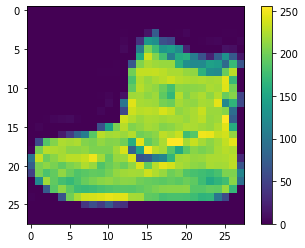

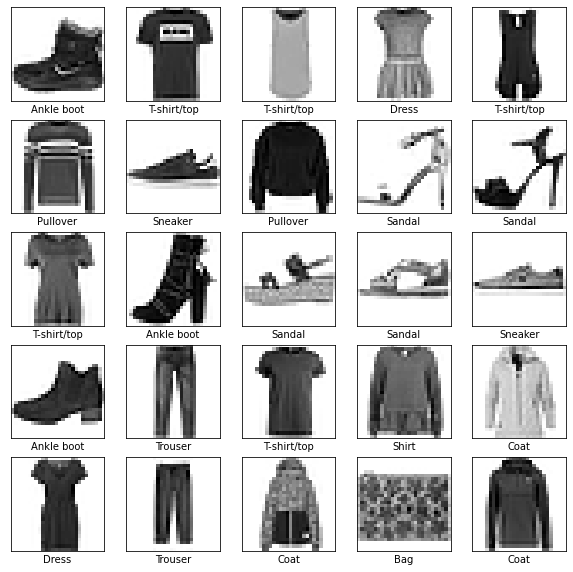

In [2]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
# To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

## Build MLP Model

In [3]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])

### Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
##### Loss function - This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
##### Optimizer - This is how the model is updated based on the data it sees and its loss function.
##### Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [5]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Train the model
##### Training the neural network model requires the following steps:
##### 1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
##### 2. The model learns to associate images and labels.
##### 3. You ask the model to make predictions about a test set—in this example, the test_images array.
##### 4. Verify that the predictions match the labels from the test_labels array.

In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4967 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3741 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

## Evaluate accuracy

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3237 - accuracy: 0.8881

Test accuracy: 0.8881000280380249


## Inference

In [8]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
# A prediction is an array of 10 numbers.
# They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see w
np.argmax(predictions[0])

# prediction label
test_labels[0]

9

## Visualization

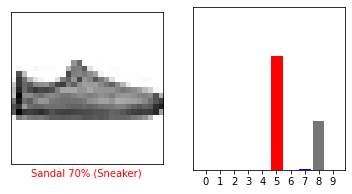

In [9]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

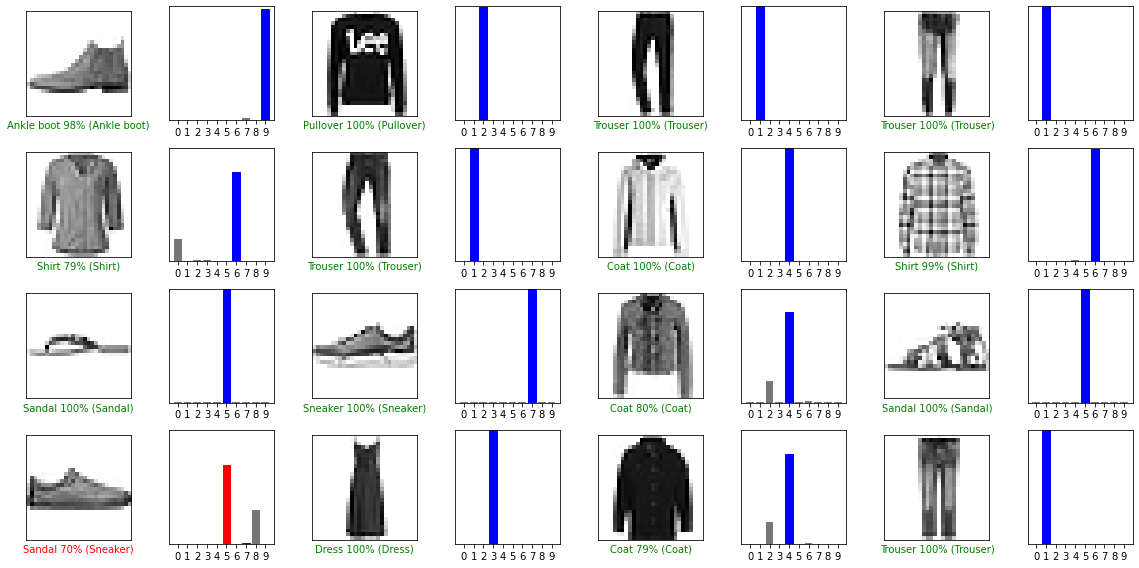

In [10]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Use the Trained model for Prediction

(28, 28)
(1, 28, 28)
[[5.6585261e-11 3.5685525e-13 3.1032639e-13 1.0316741e-11 1.3862735e-12
  1.4038793e-06 5.9399702e-10 7.4935039e-03 1.3294449e-10 9.9250507e-01]]


9

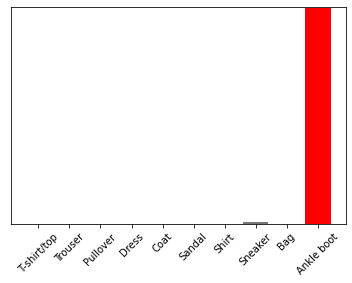

In [11]:
img = test_images[428]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])